# Import modules and load case

In [1]:
import numpy as np
import pandas as pd
from scipy.io import savemat

import pandapower as pp
import pandapower.networks as pn
import pandapower.converter as pc
import pandapower.plotting as plot

# bus dataframe
bd = pd.read_excel('P1.xlsx') 

# Starting network and Slack bus

net = pp.create_empty_network()
pp.create_bus(net, 11.4, name='S/S 1 Bus bar', index=0, geodata=None, type='b', zone=1, in_service=True, max_vm_pu=1.05, min_vm_pu=0.95)
pp.create_bus(net, 11.4, name='S/S 2 Bus bar', index=84, geodata=None, type='b', zone=2, in_service=True, max_vm_pu=1.05, min_vm_pu=0.95)
pp.create_ext_grid(net, 0, vm_pu=1.0)    

0

# Create BUS entries


In [2]:
for i in range(1,84):
    if (i>=1 and i<=10):
        zone_name='Feeder A'
    elif (i>=11 and i<=14):
        zone_name='Feeder B'
    elif (i>=15 and i<=24):
        zone_name='Feeder C'
    elif (i>=25 and i<=29):
        zone_name='Feeder D'
    elif (i>=30 and i<=42):
        zone_name='Feeder E'
    elif (i>=43 and i<=46):
        zone_name='Feeder F'    
    elif (i>=47 and i<=55):
        zone_name='Feeder G'
    elif (i>=56 and i<=64):
        zone_name='Feeder H'
    elif (i>=65 and i<=72):
        zone_name='Feeder I'
    elif (i>=73 and i<=76):
        zone_name='Feeder J'
    elif (i>=77 and i<=83):
        zone_name='Feeder K'
    pp.create_bus(net, 11.4, name=str(i), index=i, geodata=None, type='b', zone=zone_name, in_service=True, max_vm_pu=1.05, min_vm_pu=0.95)

# Create LINE entries


In [3]:
feeders_ss1=['A', 'B', 'C', 'D', 'E', 'F']
for i in range(0,83):
    if (str(bd.From[i]).isdigit()):
        frombus_int = bd.From[i]
    else:
        if (str(bd.From[i]) in feeders_ss1):
            frombus_int = 0
        else:
            frombus_int = 84
    if (str(bd.To[i]).isdigit()):
        tobus_int =  bd.To[i]
    else:
        if (str(bd.From[i]) in feeders_ss1):
            tobus_int =  0
        else:
            tobus_int =  84
    pp.create_line_from_parameters(net, name=str(bd.From[i]) + '-' + str(bd.To[i]), from_bus = frombus_int, to_bus = tobus_int, length_km=1.0, r_ohm_per_km = bd.R[i] , x_ohm_per_km = bd.X[i], c_nf_per_km = 10, max_i_ka = 0.4)

# Closing specific SWITCH means adding the line
If we want a radial network any one of the following lines should be "on" because SS1 with SS2 will connect without loops.
1. 5-55: index 83
2. 12-72: index 86
3. 13-76: index 87
4. 20-83: index 90

Note: These indexes are referring to the dataframe of the loaded excel file which contains the data from the paper.

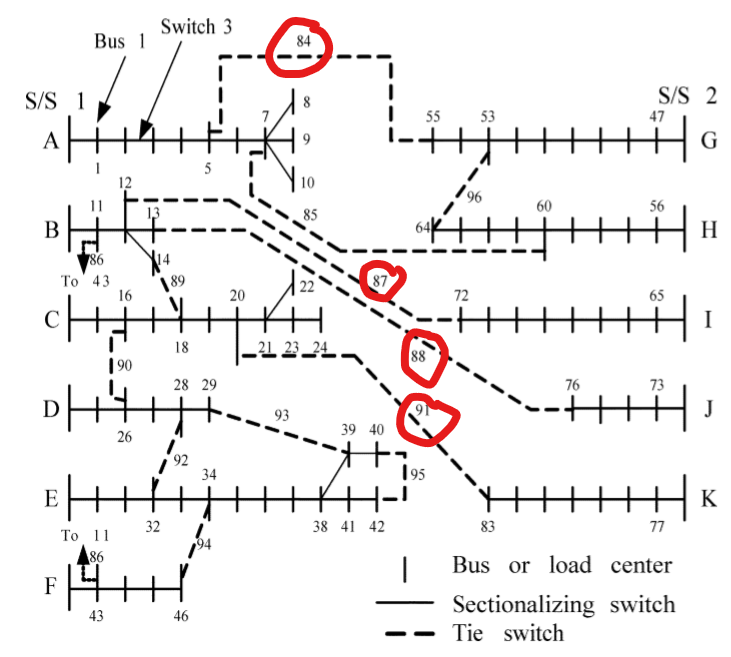

In [4]:
#we can do this by setting i to be one of the indexes above
i=83
frombus_int = bd.From[i]
tobus_int =  bd.To[i]
pp.create_line_from_parameters(net, name=str(bd.From[i]) + '-' + str(bd.To[i]), from_bus = frombus_int, to_bus = tobus_int, length_km=1.0, r_ohm_per_km = bd.R[i] , x_ohm_per_km = bd.X[i], c_nf_per_km = 10, max_i_ka = 0.4)    
ppc = pc.to_ppc(net) #Convert to ppc
Ybus, Yf, Yt = pp.makeYbus_pypower(ppc["baseMVA"], ppc["bus"], ppc["branch"]) 
savemat('Ybus_5_55closed.mat', {'Ybus': Ybus})

# I did all this based on the dickert example whose net, bus and line tables are shown bellow

In [5]:
net2 = pn.create_dickert_lv_network(feeders_range='long',linetype='C&OHL', customer='multiple')
net2.bus
net2.line
net2

This pandapower network includes the following parameter tables:
   - bus (62 elements)
   - load (60 elements)
   - ext_grid (1 element)
   - line (60 elements)
   - trafo (1 element)

In [6]:
net.bus

,name,vn_kv,type,zone,in_service,min_vm_pu,max_vm_pu
0,S/S 1 Bus bar,11.4,b,1,True,0.95,1.05
84,S/S 2 Bus bar,11.4,b,2,True,0.95,1.05
1,1,11.4,b,Feeder A,True,0.95,1.05
2,2,11.4,b,Feeder A,True,0.95,1.05
3,3,11.4,b,Feeder A,True,0.95,1.05
4,4,11.4,b,Feeder A,True,0.95,1.05
5,5,11.4,b,Feeder A,True,0.95,1.05
6,6,11.4,b,Feeder A,True,0.95,1.05
7,7,11.4,b,Feeder A,True,0.95,1.05
8,8,11.4,b,Feeder A,True,0.95,1.05


In [7]:
net.bus

,name,vn_kv,type,zone,in_service,min_vm_pu,max_vm_pu
0,S/S 1 Bus bar,11.4,b,1,True,0.95,1.05
84,S/S 2 Bus bar,11.4,b,2,True,0.95,1.05
1,1,11.4,b,Feeder A,True,0.95,1.05
2,2,11.4,b,Feeder A,True,0.95,1.05
3,3,11.4,b,Feeder A,True,0.95,1.05
4,4,11.4,b,Feeder A,True,0.95,1.05
5,5,11.4,b,Feeder A,True,0.95,1.05
6,6,11.4,b,Feeder A,True,0.95,1.05
7,7,11.4,b,Feeder A,True,0.95,1.05
8,8,11.4,b,Feeder A,True,0.95,1.05


In [8]:
net2.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,NAYY 4x150 SE,1,2,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
1,None,NAYY 4x150 SE,2,3,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
2,None,NAYY 4x150 SE,3,4,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
3,None,NAYY 4x150 SE,4,5,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
4,None,NAYY 4x150 SE,5,6,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
5,None,NAYY 4x150 SE,6,7,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
6,None,NAYY 4x150 SE,7,8,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
7,None,NAYY 4x150 SE,8,9,0.04,0.208,0.08,261.0,0.0,0.270,1.0,1,cs,True
8,None,NFA2X 4x70,9,10,0.04,0.443,0.07,12.8,0.0,0.205,1.0,1,ol,True
9,None,NFA2X 4x70,10,11,0.04,0.443,0.07,12.8,0.0,0.205,1.0,1,ol,True


In [9]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,A-1,None,0,1,1.0,0.1944,0.6624,10.0,0.0,0.4,1.0,1,None,True
1,1-2,None,1,2,1.0,0.2096,0.4304,10.0,0.0,0.4,1.0,1,None,True
2,2-3,None,2,3,1.0,0.2358,0.4842,10.0,0.0,0.4,1.0,1,None,True
3,3-4,None,3,4,1.0,0.0917,0.1883,10.0,0.0,0.4,1.0,1,None,True
4,4-5,None,4,5,1.0,0.2096,0.4304,10.0,0.0,0.4,1.0,1,None,True
5,5-6,None,5,6,1.0,0.0393,0.0807,10.0,0.0,0.4,1.0,1,None,True
6,6-7,None,6,7,1.0,0.0405,0.1380,10.0,0.0,0.4,1.0,1,None,True
7,7-8,None,7,8,1.0,0.1048,0.2152,10.0,0.0,0.4,1.0,1,None,True
8,7-9,None,7,9,1.0,0.2358,0.4842,10.0,0.0,0.4,1.0,1,None,True
9,7-10,None,7,10,1.0,0.1048,0.2152,10.0,0.0,0.4,1.0,1,None,True


In [13]:
net2.ext_grid

,name,bus,vm_pu,va_degree,in_service
0,None,0,1.0,0.0,True


In [12]:
net.ext_grid

,name,bus,vm_pu,va_degree,in_service
0,None,0,1.0,0.0,True
